In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses=cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

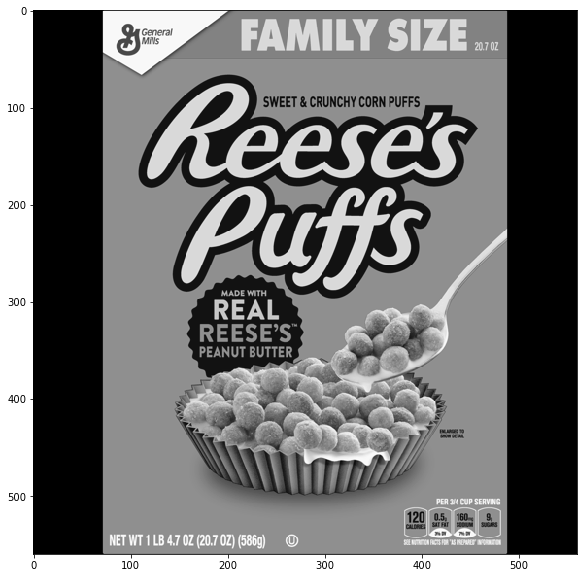

In [4]:
display(reeses)

In [5]:
cereals=cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0)


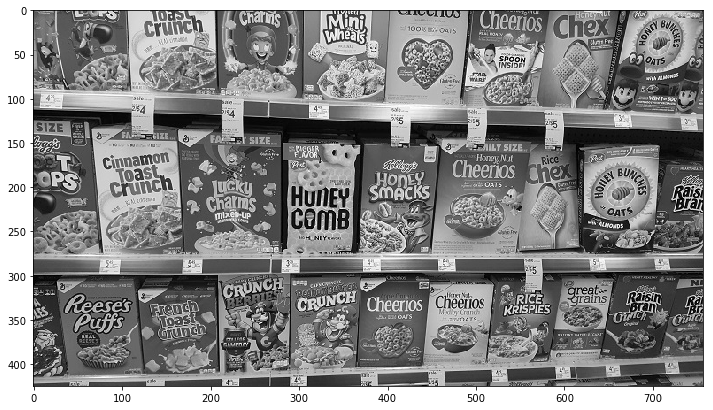

In [6]:
display(cereals)

In [7]:
orb=cv2.ORB_create()

In [8]:
kp1,des1=orb.detectAndCompute(reeses,None) #mask= none
kp2,des2=orb.detectAndCompute(cereals,None)

In [9]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [12]:
matches=bf.match(des1,des2)

In [13]:
len(matches)

263

In [11]:
matches=sorted(matches,key=lambda x:x.distance)

In [14]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

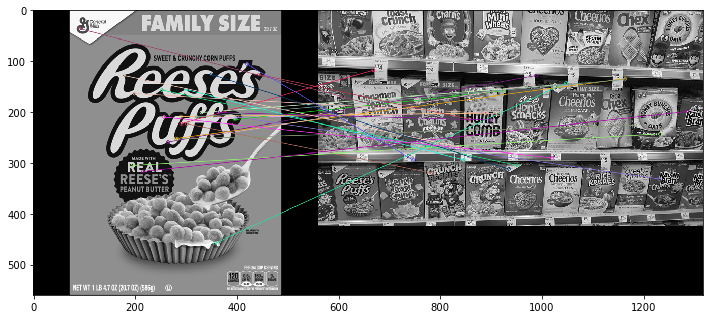

In [28]:
display(reeses_matches)

In [ ]:
#BRUTE-FORCE MATCHING WITH SIFT DESCRIPTORS AND RATIO MATCHING

In [16]:
sift=cv2.xfeatures2d.SIFT_create()

In [17]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [18]:
bf=cv2.BFMatcher()

In [19]:
matches=bf.knnMatch(des1,des2,k=2)

In [22]:
good=[]

# less distance==better match

#ratio match1<75% match2
for match1,match2 in matches:
    #if match 1 distance is less then 75% of match 2 distance
    #then descriptor was a good match,lets keep it!
    if match1.distance <0.75*match2.distance:
        good.append([match1])

In [23]:
len(good)

78

In [24]:
len(matches)

1500

In [25]:
shift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

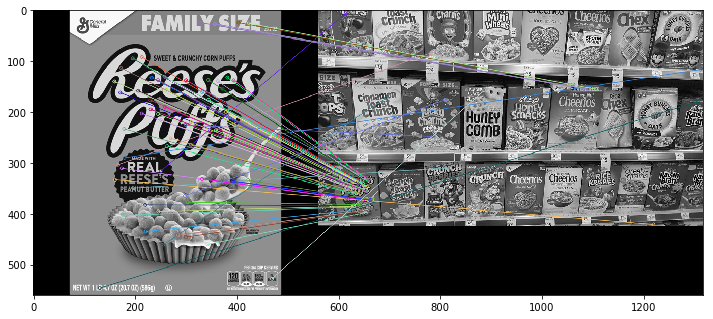

In [27]:
display(shift_matches)

In [29]:
#FLANN based matcher

In [30]:
sift=cv2.xfeatures2d.SIFT_create()

In [31]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [32]:
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,tree=5)
search_params=dict(checks=50)


In [33]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [35]:
matches=flann.knnMatch(des1,des2,k=2)

In [36]:
good=[]
for match1,match2 in matches:
    if match1.distance<0.7*match2.distance:
        good.append([match1])

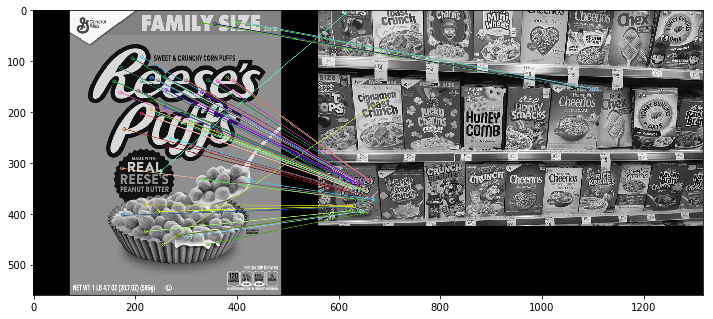

In [38]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)